In [3]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     |█████████████▌                  | 834.1 MB 1.3 MB/s eta 0:14:37tcmalloc: large alloc 1147494400 bytes == 0x655dc000 @  0x7ff2f5931615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |█████████████████               | 1055.7 MB 1.2 MB/s eta 0:12:23tcmalloc: large alloc 1434370048 bytes == 0x2e04000 @  0x7ff2f5931615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |█

In [5]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14862, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 14862 (delta 0), reused 2 (delta 0), pack-reused 14858
Receiving objects: 100% (14862/14862), 13.93 MiB | 17.78 MiB/s, done.
Resolving deltas: 100% (10222/10222), done.


In [6]:
!cd yolov5

In [7]:
! pip install -r /content/yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 29.1 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 1.6 MB 45.7 MB/s 


#Limiting the model only to desired class

In [8]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2

In [9]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model.classes = [0, 1, 2, 3, 5, 7]

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


[Errno 2] No such file or directory: '/usr/local/lib/python3.8/dist-packages/torch-1.13.0+cu116.dist-info/METADATA'


YOLOv5 🚀 2022-12-23 Python-3.8.16 torch-1.8.1+cu111 CUDA:0 (Tesla T4, 15110MiB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [29]:
img='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_Xdwg90bW1jK4WrvmeEraLwpiqNk1a-CGgg&usqp=CAU'

In [30]:
results = model(img)
results.print()

image 1/1: 168x300 1 person, 11 cars
Speed: 23.5ms pre-process, 12.8ms inference, 1.7ms NMS per image at shape (1, 3, 384, 640)


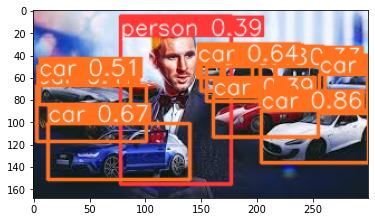

In [31]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [25]:
img='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRhXEbZxhbaVku9wHaV50UGd9iFdWd9LJCKvw&usqp=CAU'

In [28]:
results = model(img)
results.print()

image 1/1: 183x275 1 truck
Speed: 30.8ms pre-process, 15.1ms inference, 1.7ms NMS per image at shape (1, 3, 448, 640)


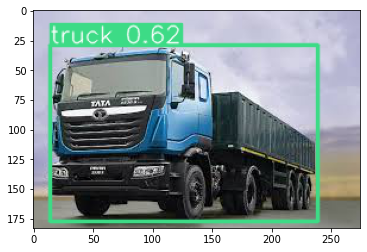

In [27]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

#Calculating Mean distances between the classes

In [ ]:
def midpoint(xmin, ymin, xmax, ymax):
  center_w = xmax - xmin
  center_h = ymax - ymin
  center_x = 0.5*(xmin + xmax)
  center_y = 0.5*(ymin + ymax)
  return (center_x, center_y)
center = []
for i in range(len(res)):
    center.append(midpoint(res['xmin'][i], res['ymin'][i], res['xmax'][i], res['ymax'][i]))
distance = pow(pow((center[0][0]-center[1][0]),2) + pow((center[0][1]-center[1][1]),2),0.5) 
  

In [ ]:
image = np.squeeze(results.render())
window_name = 'Image'
start_point = (int(center[0][0]), int(center[0][1]))

end_point = (int(center[1][0]), int(center[1][1]))

# Blue color in BGR
color = (255, 0, 0)
# Line thickness 
thickness = 15
label = str(int(distance))
text_org = (int(center[0][0] + 200) , int(center[0][1]) - 50)
image = cv2.line(image, start_point, end_point, color, thickness)
image = cv2.putText(image, label, text_org, cv2.FONT_HERSHEY_SIMPLEX, 5, color, 12,  cv2.LINE_AA)
# Displaying the image 
plt.imshow(image)
plt.show()